In [31]:
import numpy as np
import pandas as pd
from sklearn import ensemble
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

In [4]:
train_labels = pd.read_csv('Data/TrainLabels.csv')
submission = pd.read_csv('Data/SampleSubmission.csv')

In [9]:
X_train = np.load('Data/X_train.npy')
X_test = np.load('Data/X_test.npy')

In [10]:
Y_train = train_labels.Prediction.values

In [11]:
train_labels

,IdFeedBack,Prediction
0,S02_Sess01_FB001,1
1,S02_Sess01_FB002,1
2,S02_Sess01_FB003,0
3,S02_Sess01_FB004,0
4,S02_Sess01_FB005,1
...,...,...
5435,S26_Sess05_FB096,1
5436,S26_Sess05_FB097,0
5437,S26_Sess05_FB098,0
5438,S26_Sess05_FB099,0


In [22]:
print('X_train shape: ', X_train.shape)
print('X_test shape: ',  X_test.shape)

X_train shape:  (5440, 400)
X_test shape:  (3400, 400)


In [14]:
X_train = X_train.reshape((5440,20*20))
X_test = X_test.reshape((3400,20*20))

## Random Forests

In [17]:
x_train1, x_test1, y_train1, y_test1 = train_test_split(X_train, Y_train, test_size=0.2)

clf = ensemble.RandomForestClassifier(n_jobs = -1, n_estimators=150, random_state=42)
clf.fit(x_train1, y_train1)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=150,
                       n_jobs=-1, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

In [ ]:
preds = clf.predict_proba(x_test1)[:,1]

In [ ]:
def plot_roc(y, preds):
    fpr, tpr, thresholds = roc_curve(y, preds)
    plt.plot([0, 1], [0, 1], '--')
    plt.plot(fpr, tpr)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')
    plt.show()

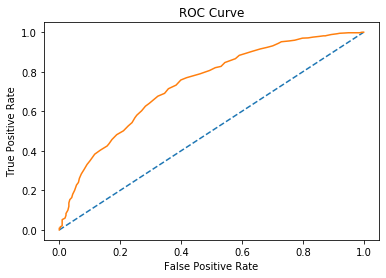

In [35]:
plot_roc(y_test1, preds)

In [16]:
true_labels = pd.read_csv('Data/true_labels.csv')

## Support Vector Machines

took 25+ minutes to run so I stopped it

In [ ]:
from sklearn.svm import SVC

svclassifier = SVC(kernel='linear')
svclassifier.fit(x_train1, y_train1)

In [ ]:
y_pred = svclassifier.predict(X_test)